In [10]:
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance, ImageChops
import numpy as np



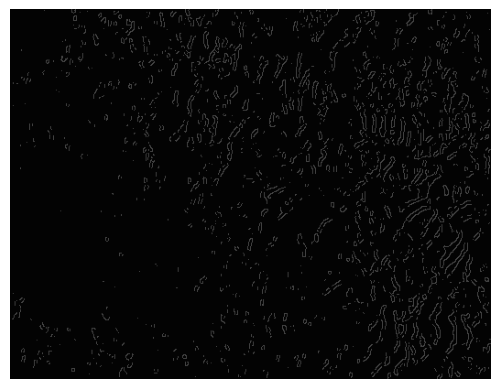

In [56]:

edge_img = Image.open('../Images/edge_map.png')

enhancer = ImageEnhance.Color(edge_img)
img_temp = enhancer.enhance(1.5)

img_tint = enhancer.enhance(0.5)  

enhancer = ImageEnhance.Brightness(img_tint)
img_highlight = enhancer.enhance(0.5)  

enhancer = ImageEnhance.Contrast(img_highlight)
img_shadows = enhancer.enhance(0.5) 

img_array = np.array(img_shadows)

plt.imshow(img_array)
plt.axis('off')  
plt.show()

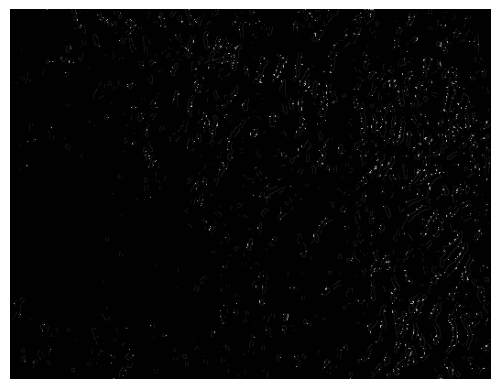

In [58]:
class_change_img = Image.open('../Images/class_change.png')

blended_img = Image.blend(img_shadows, class_change_img, 0.65)

basic_map = np.array(blended_img)

plt.imshow(basic_map)
plt.axis('off')  
plt.show()

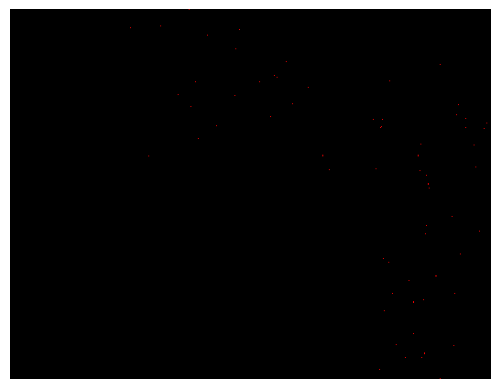

In [61]:
edge_img = Image.open('../Images/edge_map.png')
class_change_img = Image.open('../Images/class_change.png')

ava_prone_img = ImageChops.darker(edge_img, class_change_img)

ava_prone_arr = np.array(ava_prone_img)

white_color = [255, 255, 255, 255] 
red_color = [255, 0, 0, 255]  

white_pixels = np.all(ava_prone_arr == white_color, axis=-1)
if np.any(white_pixels):
    ava_prone_arr[white_pixels] = red_color


plt.imshow(ava_prone_arr)
plt.axis('off')
plt.show()

In [62]:
plt.imsave('../Images/avalanche_prone_area.png', ava_prone_arr, cmap='gray')

(-0.5, 524.5, 403.5, -0.5)

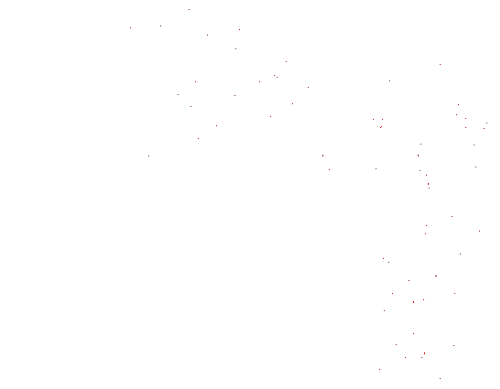

In [65]:
curr_img = Image.open('../Images/Frame 6.png')
enhancer = ImageEnhance.Brightness(curr_img)
curr_img = enhancer.enhance(0.5)

ava_prone_img = Image.open('../Images/avalanche_prone_area.png')

ava_prone_img = ava_prone_img.convert('RGBA')

ava_prone_arr = np.array(ava_prone_img)

black = [0, 0, 0, 255]  

black_pixels = np.all(ava_prone_arr[:, :, :3] == black[:3], axis=-1)
ava_prone_arr[black_pixels] = [0, 0, 0, 0]  

new_img = Image.fromarray(ava_prone_arr)

plt.imshow(ava_prone_arr)
plt.axis('off')

C:\Users\aksha\AppData\Local\Temp\ipykernel_21932\2752995272.py:1: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  overlay_img = new_img.resize(curr_img.size, Image.ANTIALIAS)


(-0.5, 524.5, 403.5, -0.5)

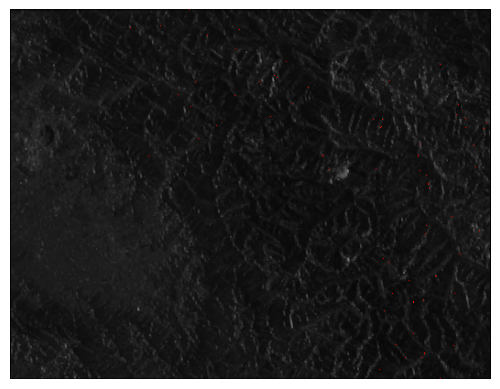

In [66]:
overlay_img = new_img.resize(curr_img.size, Image.ANTIALIAS)

composite_img = Image.alpha_composite(curr_img.convert('RGBA'), overlay_img.convert('RGBA'))

avalance_map = np.array(composite_img)

plt.imshow(avalance_map)
plt.axis('off')


In [67]:
plt.imsave('../Images/final_avalanche_prone_map.png', avalance_map, cmap='gray')